Imported necessary libraries (pandas, numpy, sklearn)


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv(r"C:\Users\WELCOME\OneDrive\Desktop\Employee-Salary-Prediction\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.sample(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
945,50,No,Travel_Rarely,1322,Research & Development,28,3,Life Sciences,1,1317,...,2,80,0,25,2,3,3,2,1,2
1018,36,No,Travel_Rarely,172,Research & Development,4,4,Life Sciences,1,1435,...,3,80,0,10,2,2,10,4,1,8
1129,42,No,Travel_Rarely,1059,Research & Development,9,2,Other,1,1595,...,4,80,0,24,2,3,1,0,0,1


Selected columns or Useful columns for Salary prediction

In [5]:
selected_columns = [
    'Age', 'Education', 'EducationField', 'JobLevel', 'JobRole',
    'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
    'PerformanceRating', 'BusinessTravel', 'MonthlyIncome'
]


In [6]:
dff = df[selected_columns]
dff.columns

Index(['Age', 'Education', 'EducationField', 'JobLevel', 'JobRole',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'PerformanceRating', 'BusinessTravel', 'MonthlyIncome'],
      dtype='object')

In [7]:
dff.sample(2)

,Age,Education,EducationField,JobLevel,JobRole,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,PerformanceRating,BusinessTravel,MonthlyIncome
949,39,2,Life Sciences,2,Manufacturing Director,9,8,7,3,Travel_Rarely,4534
85,56,3,Life Sciences,3,Manufacturing Director,37,6,4,3,Travel_Rarely,7260


x is input column and y is output column

In [8]:
x = dff.drop(columns=['MonthlyIncome'])
y =dff[['MonthlyIncome']]

in Train set 80% data and Test set having 20% extract

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

In [10]:
numeric_features = ['Age', 'Education', 'JobLevel', 'TotalWorkingYears', 
                    'YearsAtCompany', 'YearsInCurrentRole', 'PerformanceRating']

ColumnTransformer used for OnehotEncoding in norminal data and numerical column used to scaling

In [11]:
processing = ColumnTransformer([
    ('One_hot',OneHotEncoder(handle_unknown='ignore',drop='first'),['JobRole','EducationField','BusinessTravel']),
    ('Scaling',StandardScaler(),numeric_features)
],remainder='passthrough')

Using Pipeling 

In [12]:
clf = Pipeline([
    ('Processing',processing),
    ('liner_model',LinearRegression())
])

In [13]:
clf.fit(x_train,y_train.values.ravel())

Pipeline(steps=[('Processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One_hot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['JobRole', 'EducationField',
                                                   'BusinessTravel']),
                                                 ('Scaling', StandardScaler(),
                                                  ['Age', 'Education',
                                                   'JobLevel',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'PerformanceRating'])])),
                ('liner_model', LinearRegression())])

Here we use cross validation 

In [14]:
y_pred= clf.predict(x_test)
print("r2_score",r2_score(y_test,y_pred))
from sklearn.model_selection import cross_val_score
print("cross val_score ",cross_val_score(clf,x_train,y_train,scoring='r2',cv=10).mean())

r2_score 0.9371316160602452
cross val_score  0.9401569593536248


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

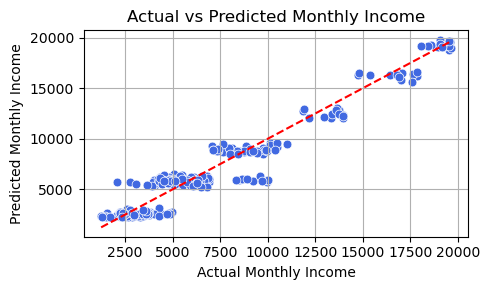

In [16]:

result_df = pd.DataFrame({'Actual': y_test.values.ravel(), 'Predicted': y_pred})

# Plot
plt.figure(figsize=(5,3))
sns.scatterplot(x='Actual', y='Predicted', data=result_df, color='royalblue', s=40)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') 
plt.title('Actual vs Predicted Monthly Income')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.grid(True)
plt.tight_layout()
plt.show()